In [1]:
import os
# Change to your project directory
os.chdir(r'C:\Users\sumey\Desktop\visual_projects\telecom_challenge')


In [2]:
# Import the load_data function from the utils file
from utils.file_upload import load_data  # Adjust the path according to your project structure

# Load the data
xdr_data_df = load_data()

# Display the DataFrame
print(xdr_data_df.head())  # Display the first 5 rows of the DataFrame

C:\Users\sumey\Desktop\visual_projects\telecom_challenge\utils\file_upload.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  xdr_data_df = pd.read_sql_query(query, connection)


      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

C:\Users\sumey\Desktop\visual_projects\telecom_challenge\utils\file_upload.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  xdr_data_df = pd.read_sql_query(query, connection)


      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [3]:
import pandas as pd
# Initialize lists to store the results
missing_values_list = []
missing_percentage_list = []

# Iterate through each column to calculate missing values and percentage
for column in xdr_data_df.columns:
    # Count missing values for the current column
    num_missing = xdr_data_df[column].isnull().sum()
    
    # Calculate the percentage of missing values for the current column
    percentage_missing = (num_missing / len(xdr_data_df)) * 100
    
    # Append results to the lists
    missing_values_list.append(num_missing)
    missing_percentage_list.append(percentage_missing)

# Create a DataFrame to display the results
missing_data = pd.DataFrame({
    'Column Name': xdr_data_df.columns,
    'Missing Values': missing_values_list,
    'Percentage (%)': missing_percentage_list
})

# Filter to show only columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]

# Print the results
print(missing_data)

                                 Column Name  Missing Values  Percentage (%)
0                                  Bearer Id             991        0.660662
1                                      Start               1        0.000667
2                                   Start ms               1        0.000667
3                                        End               1        0.000667
4                                     End ms               1        0.000667
5                                  Dur. (ms)               1        0.000667
6                                       IMSI             570        0.379997
7                              MSISDN/Number            1066        0.710662
8                                       IMEI             572        0.381331
9                         Last Location Name            1153        0.768662
10                           Avg RTT DL (ms)           27829       18.552543
11                           Avg RTT UL (ms)           27812       18.541210

C:\Users\sumey\AppData\Local\Temp\ipykernel_17156\938189520.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y='Missing Values', data=missing_data, palette='viridis')


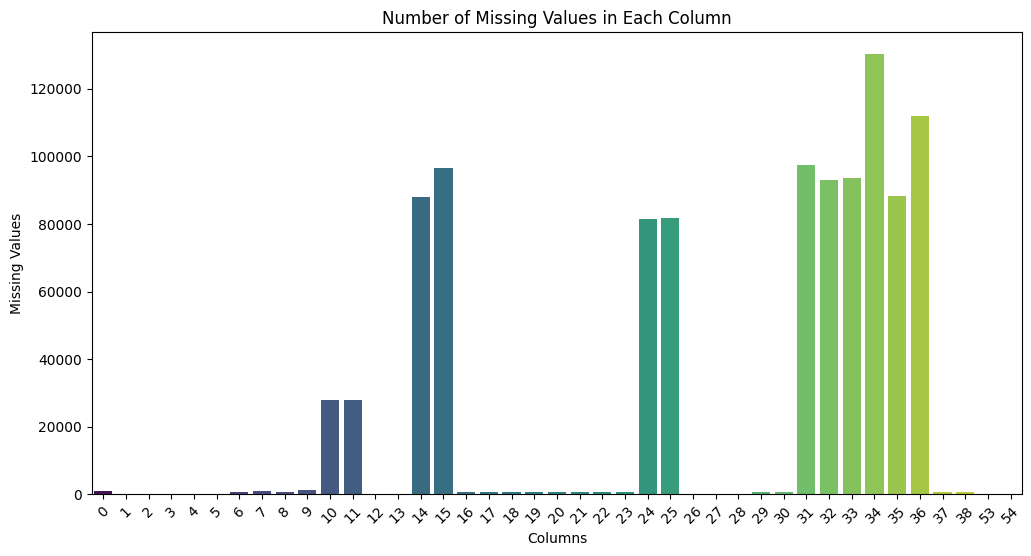

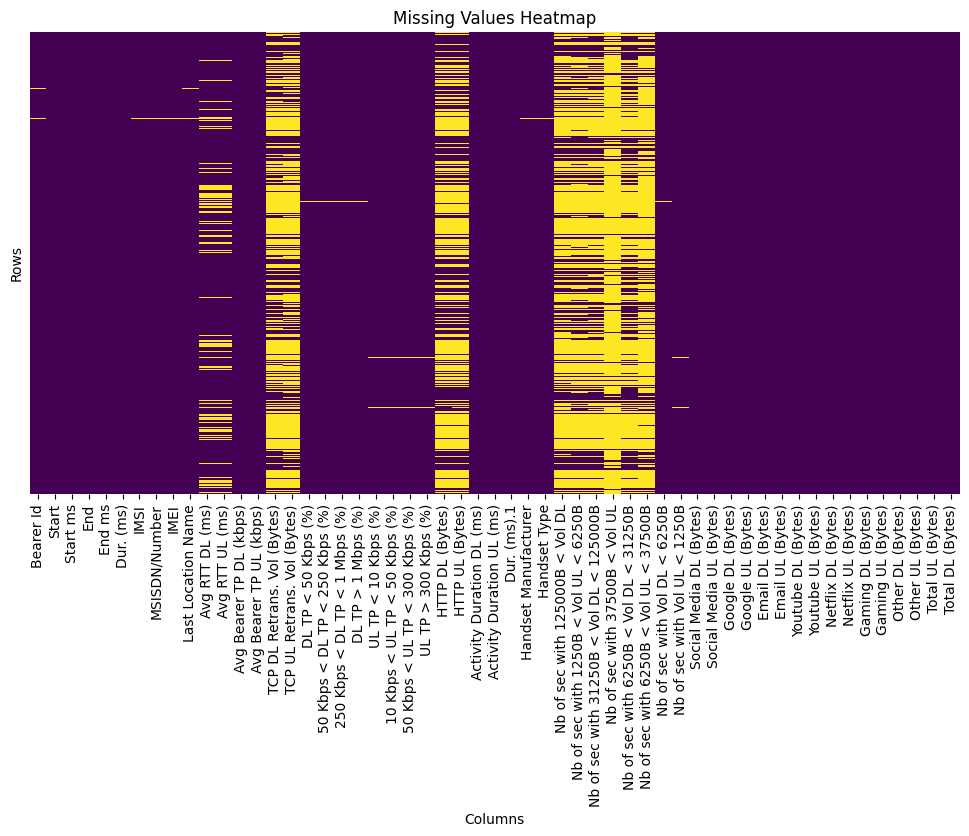

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualization 1: Bar plot for missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_data.index, y='Missing Values', data=missing_data, palette='viridis')
plt.title('Number of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Heatmap for missing values
plt.figure(figsize=(12, 6))
sns.heatmap(xdr_data_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [5]:
import pandas as pd


# List of columns to process or fill the null
columns_to_fill = [
    'Social Media DL (Bytes)',
    'Social Media UL (Bytes)',
    'Netflix DL (Bytes)',
    'Netflix UL (Bytes)',
    'Google DL (Bytes)',
    'Google UL (Bytes)',
    'Email DL (Bytes)',
    'Email UL (Bytes)',
    'Gaming DL (Bytes)',
    'Gaming UL (Bytes)',
    'Youtube DL (Bytes)', 
    'Youtube UL (Bytes)',   
    'Total DL (Bytes)',
    'Total UL (Bytes)'
]


# Display the DataFrame before filling nulls
print(xdr_data_df[columns_to_fill].isnull().sum())  # Check if there are any remaining nulls




Social Media DL (Bytes)    0
Social Media UL (Bytes)    0
Netflix DL (Bytes)         0
Netflix UL (Bytes)         0
Google DL (Bytes)          0
Google UL (Bytes)          0
Email DL (Bytes)           0
Email UL (Bytes)           0
Gaming DL (Bytes)          0
Gaming UL (Bytes)          0
Youtube DL (Bytes)         0
Youtube UL (Bytes)         0
Total DL (Bytes)           1
Total UL (Bytes)           1
dtype: int64


In [6]:

# Fill null values with the mean for each specified column
for column in columns_to_fill:
    if column in xdr_data_df.columns:  # Check if the column exists
        mean_value = xdr_data_df[column].mean()  # Calculate mean
        xdr_data_df[column].fillna(mean_value, inplace=True)  # Fill nulls with mean
# Display the DataFrame after filling nulls
print(xdr_data_df[columns_to_fill].isnull().sum())  # Check if there are any remaining nulls

Social Media DL (Bytes)    0
Social Media UL (Bytes)    0
Netflix DL (Bytes)         0
Netflix UL (Bytes)         0
Google DL (Bytes)          0
Google UL (Bytes)          0
Email DL (Bytes)           0
Email UL (Bytes)           0
Gaming DL (Bytes)          0
Gaming UL (Bytes)          0
Youtube DL (Bytes)         0
Youtube UL (Bytes)         0
Total DL (Bytes)           0
Total UL (Bytes)           0
dtype: int64


C:\Users\sumey\AppData\Local\Temp\ipykernel_17156\825462559.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  xdr_data_df[column].fillna(mean_value, inplace=True)  # Fill nulls with mean


In [7]:
total_entries = len(xdr_data_df)
print("Total Number of Entries in the Dataset:", total_entries)
# Sum the values in the 'Dur. (ms).1' column
total_duration_ms = xdr_data_df['Dur. (ms).1'].sum()
total_duration_in_hour=total_duration_ms/3600000
total_dl = xdr_data_df['Total DL (Bytes)'].sum()
total_ul=xdr_data_df['Total UL (Bytes)'].sum()


# lets do the social medias together
# Sum the specified columns
sum_columns = [
    'Social Media DL (Bytes)',
    'Social Media UL (Bytes)',
    'Netflix DL (Bytes)',
    'Netflix UL (Bytes)',
    'Google DL (Bytes)',
    'Google UL (Bytes)',
    'Email DL (Bytes)',
    'Email UL (Bytes)',
    'Gaming DL (Bytes)',
    'Gaming UL (Bytes)',
    "Youtube DL (Bytes)",
    "Youtube UL (Bytes)"
    
]

# Create a dictionary to hold the sums
sums = {column: xdr_data_df[column].sum() for column in sum_columns}

# Convert the sums to a DataFrame for better display
sums_df = pd.DataFrame(list(sums.items()), columns=['Column Name', 'Sum (Bytes)'])

# Display the sums
print(sums_df)

# Print the result
print("Total Duration (ms):", total_duration_ms)
print("total duration (hr) : " , total_duration_in_hour,"hr")
print("total dl data :", total_dl, "Byte")
print("totla ul :", total_ul, 'byte')



Total Number of Entries in the Dataset: 150001
                Column Name   Sum (Bytes)
0   Social Media DL (Bytes)  2.693001e+11
1   Social Media UL (Bytes)  4.939298e+09
2        Netflix DL (Bytes)  1.744039e+12
3        Netflix UL (Bytes)  1.650274e+12
4         Google DL (Bytes)  8.626186e+11
5         Google UL (Bytes)  3.084833e+11
6          Email DL (Bytes)  2.687611e+11
7          Email UL (Bytes)  7.010648e+10
8         Gaming DL (Bytes)  6.330713e+13
9         Gaming UL (Bytes)  1.243268e+12
10       Youtube DL (Bytes)  1.745123e+12
11       Youtube UL (Bytes)  1.651423e+12
Total Duration (ms): 15691365831902.0
total duration (hr) :  4358712.731083889 hr
total dl data : 68196969155275.08 Byte
totla ul : 6168222065022.292 byte


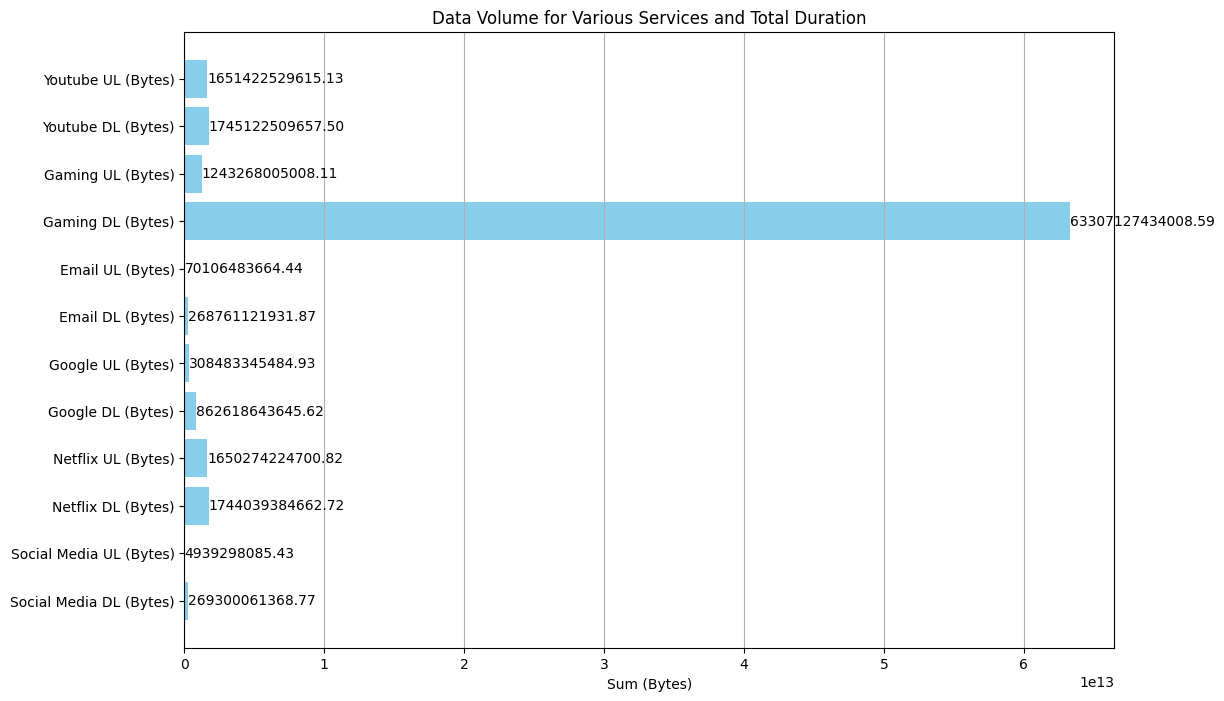

In [11]:
import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(12, 8))

# Plotting the data with totals included in the bar plot
plt.barh(sums_df['Column Name'], sums_df['Sum (Bytes)'], color='skyblue')
plt.xlabel('Sum (Bytes)')
plt.title('Data Volume for Various Services and Total Duration')

# Adding text labels for clarity
for index, value in enumerate(sums_df['Sum (Bytes)']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10,
             color='red' if 'Total' in sums_df['Column Name'][index] else 'black')

# Adding grid for better readability
plt.grid(axis='x')

# Show the plot
plt.show()
